#  Haberman's Survival Data

# Objective:

We performing the Exploratoray Data Analysis on Haberman's Survival Dataset to find out that how many patients survived or died after or wihtin 5 years of operation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CSV file into pandas dataframe
df=pd.read_csv("haberman.csv")

In [3]:
# How many datapoints and features are in this dataset?
print(df.shape)

(305, 4)


In [4]:
# What are the column names in our dataset?
print(df.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [5]:
# Adding the columns name the rechecking them.
df.columns=["Age","Operation_year","Axil_nodes","Surv_status"]
print(df.columns)

Index(['Age', 'Operation_year', 'Axil_nodes', 'Surv_status'], dtype='object')


In [8]:
# How many datapoints for each class are present?
# Survival_status: 1.Survived 2.Died
df['Surv_status']=df['Surv_status'].apply(lambda x:'Survived'if x==1 else 'Died')
df['Surv_status'].value_counts()


Survived    224
Died         81
Name: Surv_status, dtype: int64

In [10]:
df.head(10)

,Age,Operation_year,Axil_nodes,Surv_status
0,30,62,3,Survived
1,30,65,0,Survived
2,31,59,2,Survived
3,31,65,4,Survived
4,33,58,10,Survived
5,33,60,0,Survived
6,34,59,0,Died
7,34,66,9,Died
8,34,58,30,Survived
9,34,60,1,Survived


In [12]:
df.describe()

,Age,Operation_year,Axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


### Observation:

1- This dataset has 305 datapoints and 4 features(Including the class feature).

2- In this given dataset the Minimum Age of a patient is 30 and Maximum is 83.

3- 75% Patients had nodes from 0 to 4 and 25% patients had no nodes.

4- Haberman's Survival Dataset is imbalanced dataset. 
 

 # Univariate Analysis
 
 Data distribution of different features to understand which feature is more useful to understand the data more clearly.

## Histogram and PDF

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


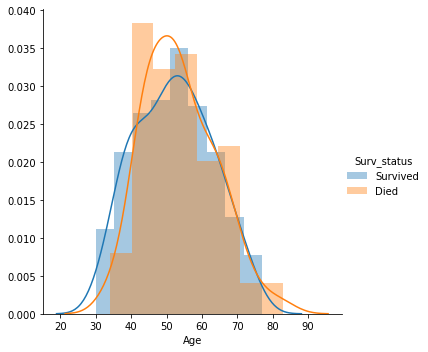

In [18]:
# Distribution of Age.
sns.FacetGrid(df,hue='Surv_status',height=5)\
.map(sns.distplot,'Age')\
.add_legend()
plt.show()

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


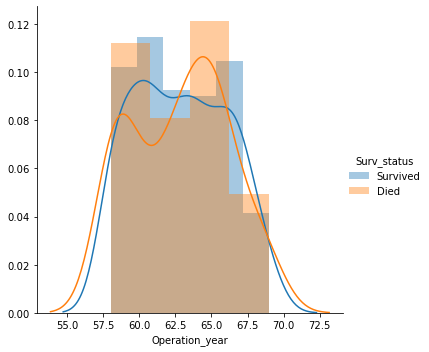

In [19]:
# Operations year
sns.FacetGrid(df,hue='Surv_status',height=5)\
.map(sns.distplot,'Operation_year')\
.add_legend()
plt.show()

### Observation:

1- Well, data is highly overlapped hence it is very hard to gain any information from this plot.

2- Seeing the PDF we can say that before 1962 many patients survived but from 1962 to 1967 many patients lost their lives.

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


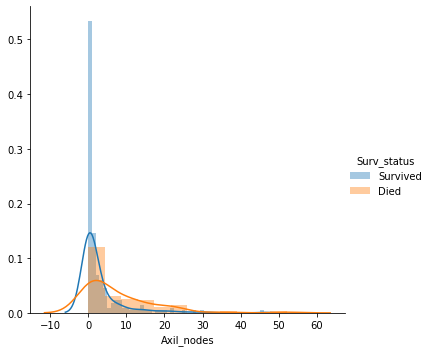

In [22]:
# Axillary nodes
sns.FacetGrid(df, hue="Surv_status", size=5)\
.map(sns.distplot, "Axil_nodes").add_legend();
plt.show()

### Observation:

1- Patients who had nodes a range(0,5) survived more than those patients who had nodes more than 10.

2- 95% Patient has axil nodes from 0 to 25.

## PDF and CDF:

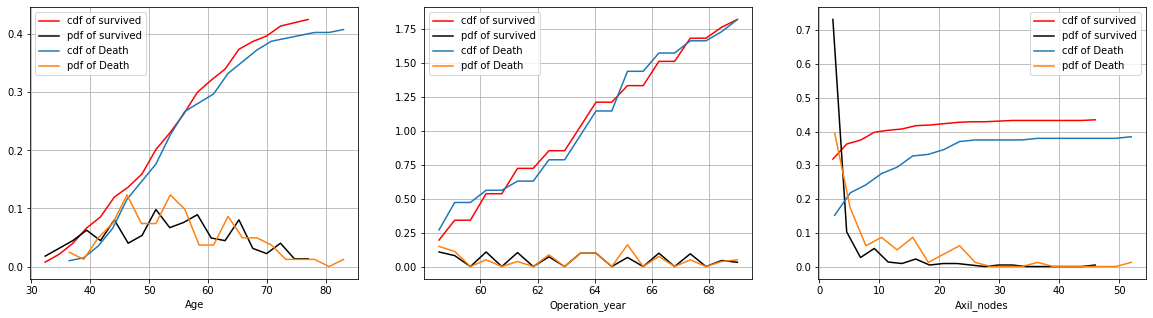

In [28]:
Survived= df.loc[df["Surv_status"]== "Survived"]
Died = df.loc[df["Surv_status"]=="Died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(df.columns)[:-1]):
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()

### Obeservation:

1- Patient with age between age 30-36 has definitly survived the operation and pataient aged 77-85 has definitly not survived the operation.

2- Patient who had nodes between 0-4 has higher chance of survived and Patient who has nodes more than 25 counld'nt survived.

## Box Plots and Whiskers

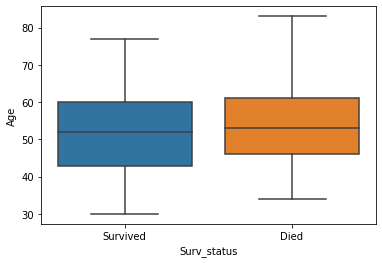

In [35]:
sns.boxplot(x='Surv_status',y='Age',data=df)
plt.show()

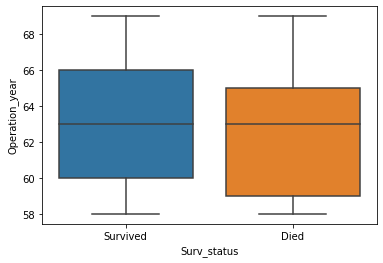

In [37]:
sns.boxplot(x='Surv_status',y='Operation_year',data=df)
plt.show()

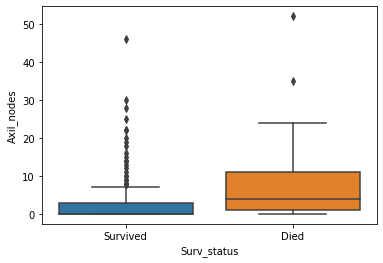

In [39]:
sns.boxplot(x='Surv_status',y='Axil_nodes',data=df)
plt.show()

### Observation:

1- From box plot we can observe that a patient having 0 zero nodes will definetly survived.

2- Patient under the age of 42 has more chances to survived.

# Violin Plots

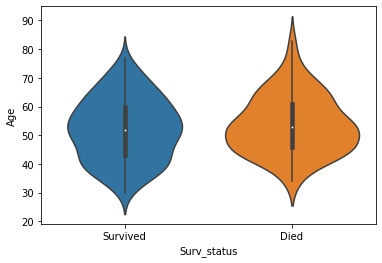

In [41]:
sns.violinplot(x='Surv_status',y='Age',data=df,height=8)
plt.show()

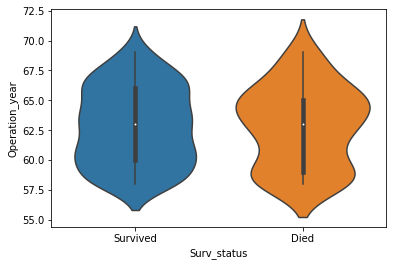

In [42]:
sns.violinplot(x='Surv_status',y='Operation_year',data=df,height=8)
plt.show()

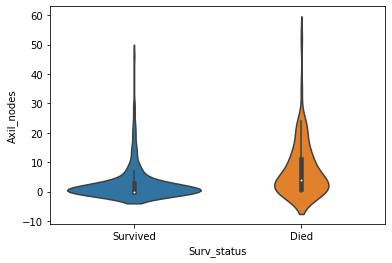

In [43]:
sns.violinplot(x='Surv_status',y='Axil_nodes',data=df,height=8)
plt.show()

### Observation:

From violin plot we can say that those who are having zero nodes will survive.

# Bivariate Analysis

## 2D Scatter Plot

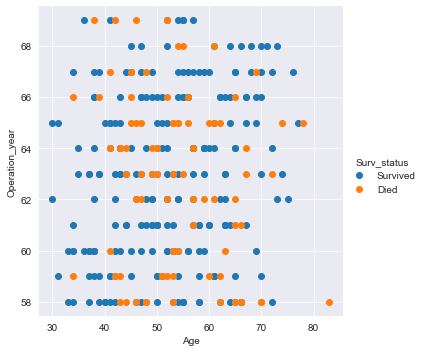

In [45]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue='Surv_status',height=5)\
.map(plt.scatter,'Age','Operation_year')\
.add_legend()
plt.show()

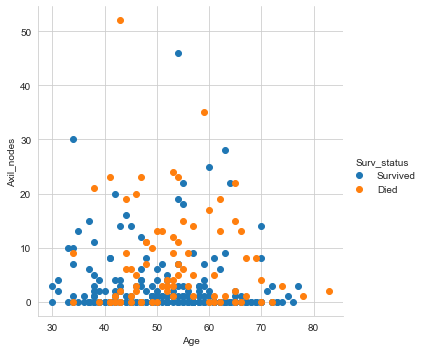

In [48]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Surv_status',height=5)\
.map(plt.scatter,'Age','Axil_nodes')\
.add_legend()
plt.show()

### Observation:

In 2D Scatter plot Data is highly overlapped hence we can't make any conclusion.

## Pair Plot

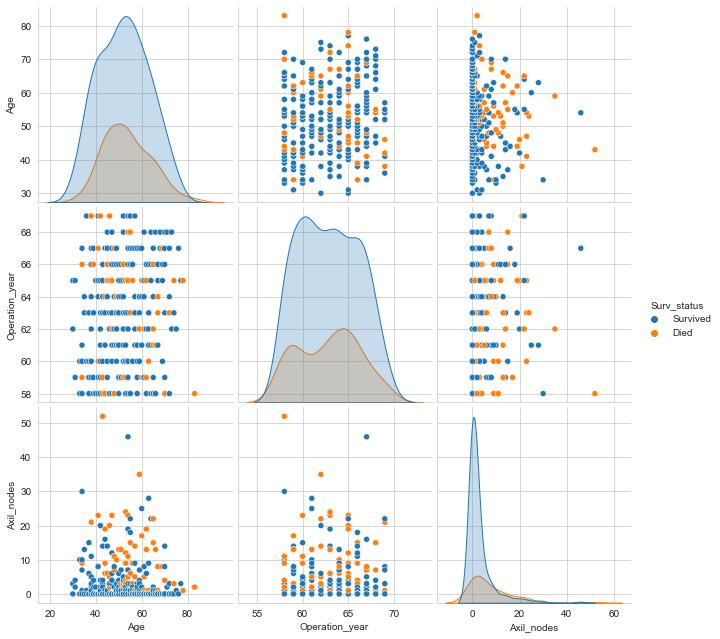

In [50]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df,hue='Surv_status',height=3)
plt.show()

### Observation:

1- It's very hard to make any conclusion with help Age or Operation year.

2- Positive_axillary_nodes is a useful feature to identify the survival_status of cancer patients

# Final Conclusion:

1- Axil_nodes is the only inportant feature in this dataset from which we can identify the status of Cancer Patient.

2- It is observed those having less than 5 nodes survived more than 5 years after operation.

3- The data is  higly mixed up so it is very hard to make any model.